In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

%load_ext autoreload
%autoreload 2



In [7]:

csv_files = [f"grid_{n}.csv" for n in range (10,35, 5)]


f_rates = pd.DataFrame()


for num, file in enumerate(csv_files):

    df = pd.read_csv(file)
    df = df.dropna(subset="dropoff_time") # drop car agents

    fulfilled = df[df["dropoff_time"] != -1] # passengers whose requests were fulfilled
    unique_fulfilled = fulfilled.drop_duplicates(subset=['seed_int', 'iteration', 'num_drivers', 'strategy', 'AgentID', 'rate'], keep='last')
    
    unique_df = df.drop_duplicates(subset=['seed_int', 'iteration', 'num_drivers', 'strategy', 'AgentID', 'rate'], keep='last')
    
    for strategy in ["StepType.CLOSEST", "StepType.QUEUE", "StepType.WAITING"]:
        for i in range(1,6):

            num_fulfilled = len(unique_fulfilled[(unique_fulfilled["strategy"] == strategy) & (unique_fulfilled["num_drivers"] == i) & (unique_fulfilled["size"] == num*5+10)])

            total = len(unique_df[(unique_df["strategy"] == strategy) & (unique_df["num_drivers"] == i) & (unique_df["size"] == num*5+10)])
            print(strategy, num*5+10, i, num_fulfilled, total)

            f_rate = (num_fulfilled/total) * 100

            f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'grid': num*5+10}, ignore_index=True)


f_rates

StepType.CLOSEST 10 1 2495 3625
StepType.CLOSEST 10 2 3544 3650
StepType.CLOSEST 10 3 3580 3675
StepType.CLOSEST 10 4 3610 3700
StepType.CLOSEST 10 5 3635 3725
StepType.QUEUE 10 1 2379 3625
StepType.QUEUE 10 2 3536 3650
StepType.QUEUE 10 3 3578 3675
StepType.QUEUE 10 4 3617 3700
StepType.QUEUE 10 5 3637 3725
StepType.WAITING 10 1 2395 3625
StepType.WAITING 10 2 3530 3650
StepType.WAITING 10 3 3581 3675
StepType.WAITING 10 4 3601 3700
StepType.WAITING 10 5 3637 3725


C:\Users\lokhe\AppData\Local\Temp\ipykernel_30452\1392315979.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'grid': num*5+10}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30452\1392315979.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'grid': num*5+10}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30452\1392315979.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'grid': num*5+10}, ignore_index=True)
C:\Users\lokhe\AppData\Lo

StepType.CLOSEST 15 1 1766 3625
StepType.CLOSEST 15 2 2993 3650
StepType.CLOSEST 15 3 3354 3675
StepType.CLOSEST 15 4 3416 3700
StepType.CLOSEST 15 5 3429 3725
StepType.QUEUE 15 1 1687 3625
StepType.QUEUE 15 2 2955 3650
StepType.QUEUE 15 3 3358 3675
StepType.QUEUE 15 4 3435 3700
StepType.QUEUE 15 5 3402 3725
StepType.WAITING 15 1 1650 3625
StepType.WAITING 15 2 2960 3650
StepType.WAITING 15 3 3355 3675
StepType.WAITING 15 4 3375 3700
StepType.WAITING 15 5 3413 3725


C:\Users\lokhe\AppData\Local\Temp\ipykernel_30452\1392315979.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'grid': num*5+10}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30452\1392315979.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'grid': num*5+10}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30452\1392315979.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'grid': num*5+10}, ignore_index=True)
C:\Users\lokhe\AppData\Lo

StepType.CLOSEST 20 1 1381 3625
StepType.CLOSEST 20 2 2424 3650
StepType.CLOSEST 20 3 2966 3675
StepType.CLOSEST 20 4 3094 3700
StepType.CLOSEST 20 5 3064 3725
StepType.QUEUE 20 1 1325 3625
StepType.QUEUE 20 2 2399 3650
StepType.QUEUE 20 3 2962 3675
StepType.QUEUE 20 4 3052 3700
StepType.QUEUE 20 5 3057 3725
StepType.WAITING 20 1 1314 3625
StepType.WAITING 20 2 2392 3650
StepType.WAITING 20 3 2945 3675
StepType.WAITING 20 4 3043 3700
StepType.WAITING 20 5 3071 3725


C:\Users\lokhe\AppData\Local\Temp\ipykernel_30452\1392315979.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'grid': num*5+10}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30452\1392315979.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'grid': num*5+10}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30452\1392315979.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'grid': num*5+10}, ignore_index=True)
C:\Users\lokhe\AppData\Lo

StepType.CLOSEST 25 1 1091 3625
StepType.CLOSEST 25 2 1933 3650
StepType.CLOSEST 25 3 2476 3675
StepType.CLOSEST 25 4 2664 3700
StepType.CLOSEST 25 5 2717 3725
StepType.QUEUE 25 1 1090 3625
StepType.QUEUE 25 2 1959 3650
StepType.QUEUE 25 3 2478 3675
StepType.QUEUE 25 4 2648 3700


C:\Users\lokhe\AppData\Local\Temp\ipykernel_30452\1392315979.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'grid': num*5+10}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30452\1392315979.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'grid': num*5+10}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30452\1392315979.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'grid': num*5+10}, ignore_index=True)
C:\Users\lokhe\AppData\Lo

StepType.QUEUE 25 5 2724 3725
StepType.WAITING 25 1 1096 3625
StepType.WAITING 25 2 1904 3650
StepType.WAITING 25 3 2460 3675
StepType.WAITING 25 4 2673 3700
StepType.WAITING 25 5 2691 3725


C:\Users\lokhe\AppData\Local\Temp\ipykernel_30452\1392315979.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'grid': num*5+10}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30452\1392315979.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'grid': num*5+10}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30452\1392315979.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'grid': num*5+10}, ignore_index=True)
C:\Users\lokhe\AppData\Lo

StepType.CLOSEST 30 1 913 3625
StepType.CLOSEST 30 2 1617 3650
StepType.CLOSEST 30 3 2071 3675
StepType.CLOSEST 30 4 2293 3700
StepType.CLOSEST 30 5 2289 3725
StepType.QUEUE 30 1 896 3625
StepType.QUEUE 30 2 1630 3650
StepType.QUEUE 30 3 2063 3675
StepType.QUEUE 30 4 2268 3700
StepType.QUEUE 30 5 2261 3725


C:\Users\lokhe\AppData\Local\Temp\ipykernel_30452\1392315979.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'grid': num*5+10}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30452\1392315979.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'grid': num*5+10}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30452\1392315979.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'grid': num*5+10}, ignore_index=True)
C:\Users\lokhe\AppData\Lo

StepType.WAITING 30 1 893 3625
StepType.WAITING 30 2 1640 3650
StepType.WAITING 30 3 2054 3675
StepType.WAITING 30 4 2324 3700
StepType.WAITING 30 5 2342 3725


C:\Users\lokhe\AppData\Local\Temp\ipykernel_30452\1392315979.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'grid': num*5+10}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30452\1392315979.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'grid': num*5+10}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30452\1392315979.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'grid': num*5+10}, ignore_index=True)
C:\Users\lokhe\AppData\Lo

,Strategy,num_drivers,f_rate,grid
0,StepType.CLOSEST,1,68.827586,10
1,StepType.CLOSEST,2,97.095890,10
2,StepType.CLOSEST,3,97.414966,10
3,StepType.CLOSEST,4,97.567568,10
4,StepType.CLOSEST,5,97.583893,10
...,...,...,...,...
70,StepType.WAITING,1,24.634483,30
71,StepType.WAITING,2,44.931507,30
72,StepType.WAITING,3,55.891156,30
73,StepType.WAITING,4,62.810811,30


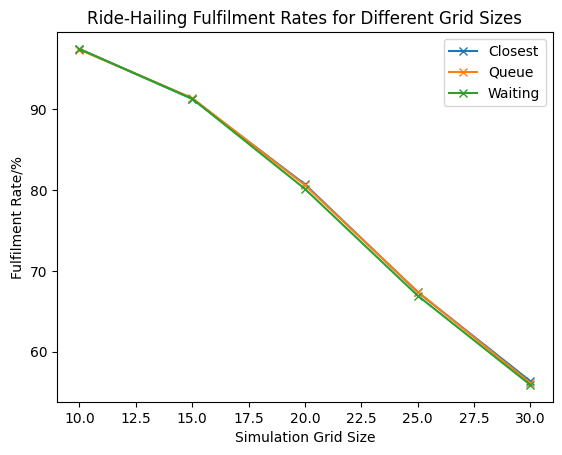

In [19]:
f_rates

n = 3
n_f_rates = f_rates[f_rates["num_drivers"] == n]

groups = n_f_rates.groupby('Strategy')
window = 3
# plot a line for each group
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['grid'], group['f_rate'], label=name, marker='x')
    # ax.set_xlim(max(group['rate']+1), min(group['rate']-1))

    # smooth_line = group['f_rate'].rolling(window=window).mean()
    # ax.plot(group['rate'], smooth_line, label=name)
    



ax.set_xlabel('Simulation Grid Size')
ax.set_ylabel('Fulfilment Rate/%')
ax.set_title('Ride-Hailing Fulfilment Rates for Different Grid Sizes')

plt.legend(['Closest', 'Queue', 'Waiting'])
plt.savefig(f"figures/hailing_frate_grid_{n}car")

In [70]:
one_car = f_rates[f_rates["num_drivers"]==1]
df_pivot = one_car.pivot(index=['grid'], columns=('Strategy'), values='f_rate')

df_pivot
# df_pivot.to_latex()


Strategy,StepType.CLOSEST,StepType.QUEUE,StepType.WAITING
grid,,,
10,68.827586,65.627586,66.068966
15,48.717241,46.537931,45.517241
20,38.096552,36.551724,36.248276
25,30.096552,30.068966,30.234483
30,25.186207,24.717241,24.634483
